# Examine the physical properties of the classified asteroids.
The proper orbital elements, inverse diameters and absolute magnitudes $H$ are investigated. These were obtained from the [MP3C](https://mp3c.oca.eu/) database (on November 18 2023).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import pandas as pd

from astropy.visualization import HistEqStretch, ImageNormalize
from astropy.table import Table

from tqdm import tqdm

from agabpylib.plotting.plotstyles import useagab, apply_tufte
from reflspectratools import (
    plot_spectra_collection,
    extract_spectra,
    create_families_table,
    get_hband_nohband_indices,
    plot_ctype_families,
    get_resonances,
)

useagab(fontsize=22, linewidths=3, axislinewidths=2)

## Load the data

In [2]:
mainbelt = Table.read("./data/mp3c-best-values.fits.gz", format="fits").to_pandas()

dr3classified = Table.read(
    "./outputs/DR3ReflSpecCvsOtherType.fits", format="fits"
).to_pandas()
dr3classified["parent_name"] = dr3classified.parent_name.str.decode("utf-8")
dr3classified["denomination"] = dr3classified.denomination.str.decode("utf-8")

dr3hband = Table.read(
    "./outputs/DR3ReflSpectraHvsNoHband.fits", format="fits"
).to_pandas()
dr3hband["parent_name"] = dr3hband.parent_name.str.decode("utf-8")
dr3hband["denomination"] = dr3hband.denomination.str.decode("utf-8")

In [3]:
print("Main belt all")
print(
    f"Minimum H for asteroids with a_p: {np.min(mainbelt.h[~np.isnan(mainbelt.a_p)])}"
)
print(
    f"Maximum H for asteroids with a_p: {np.max(mainbelt.h[~np.isnan(mainbelt.a_p)])}"
)
print(
    f"Minimum a_p for asteroids with a_p: {np.min(mainbelt.a_p[~np.isnan(mainbelt.a_p)])}"
)
print(
    f"Maximum a_p for asteroids with a_p: {np.max(mainbelt.a_p[~np.isnan(mainbelt.a_p)])}"
)
print(
    f"Minimum e_p for asteroids with a_p: {np.min(mainbelt.e_p[~np.isnan(mainbelt.a_p)])}"
)
print(
    f"Maximum e_p for asteroids with a_p: {np.max(mainbelt.e_p[~np.isnan(mainbelt.a_p)])}"
)
print(
    f"Minimum sin_i_p for asteroids with a_p: {np.min(mainbelt.sin_i_p[~np.isnan(mainbelt.a_p)])}"
)
print(
    f"Maximum sin_i_p for asteroids with a_p: {np.max(mainbelt.sin_i_p[~np.isnan(mainbelt.a_p)])}"
)
print()

print("Gaia DR3 reflectance spectra")
print(
    f"Minimum H for asteroids with a_p: {np.min(dr3classified.h[~np.isnan(dr3classified.a_p)])}"
)
print(
    f"Maximum H for asteroids with a_p: {np.max(dr3classified.h[~np.isnan(dr3classified.a_p)])}"
)
print(
    f"Minimum a_p for asteroids with a_p: {np.min(dr3classified.a_p[~np.isnan(dr3classified.a_p)])}"
)
print(
    f"Maximum a_p for asteroids with a_p: {np.max(dr3classified.a_p[~np.isnan(dr3classified.a_p)])}"
)
print(
    f"Minimum e_p for asteroids with a_p: {np.min(dr3classified.e_p[~np.isnan(dr3classified.a_p)])}"
)
print(
    f"Maximum e_p for asteroids with a_p: {np.max(dr3classified.e_p[~np.isnan(dr3classified.a_p)])}"
)
print(
    f"Minimum sin_i_p for asteroids with a_p: {np.min(dr3classified.sin_i_p[~np.isnan(dr3classified.a_p)])}"
)
print(
    f"Maximum sin_i_p for asteroids with a_p: {np.max(dr3classified.sin_i_p[~np.isnan(dr3classified.a_p)])}"
)

Main belt all
Minimum H for asteroids with a_p: 0.0
Maximum H for asteroids with a_p: 20.600000381469727
Minimum a_p for asteroids with a_p: 1.7240999937057495
Maximum a_p for asteroids with a_p: 3.9688000679016113
Minimum e_p for asteroids with a_p: 0.000699999975040555
Maximum e_p for asteroids with a_p: 0.5062999725341797
Minimum sin_i_p for asteroids with a_p: 0.0010000000474974513
Maximum sin_i_p for asteroids with a_p: 0.8884999752044678

Gaia DR3 reflectance spectra
Minimum H for asteroids with a_p: 3.4000000953674316
Maximum H for asteroids with a_p: 17.760000228881836
Minimum a_p for asteroids with a_p: 1.7870999574661255
Maximum a_p for asteroids with a_p: 3.968400001525879
Minimum e_p for asteroids with a_p: 0.0008999999845400453
Maximum e_p for asteroids with a_p: 0.47510001063346863
Minimum sin_i_p for asteroids with a_p: 0.0010999999940395355
Maximum sin_i_p for asteroids with a_p: 0.6948000192642212


## Compare all asteroids with Gaia DR3 reflectance spectra to overall main belt population

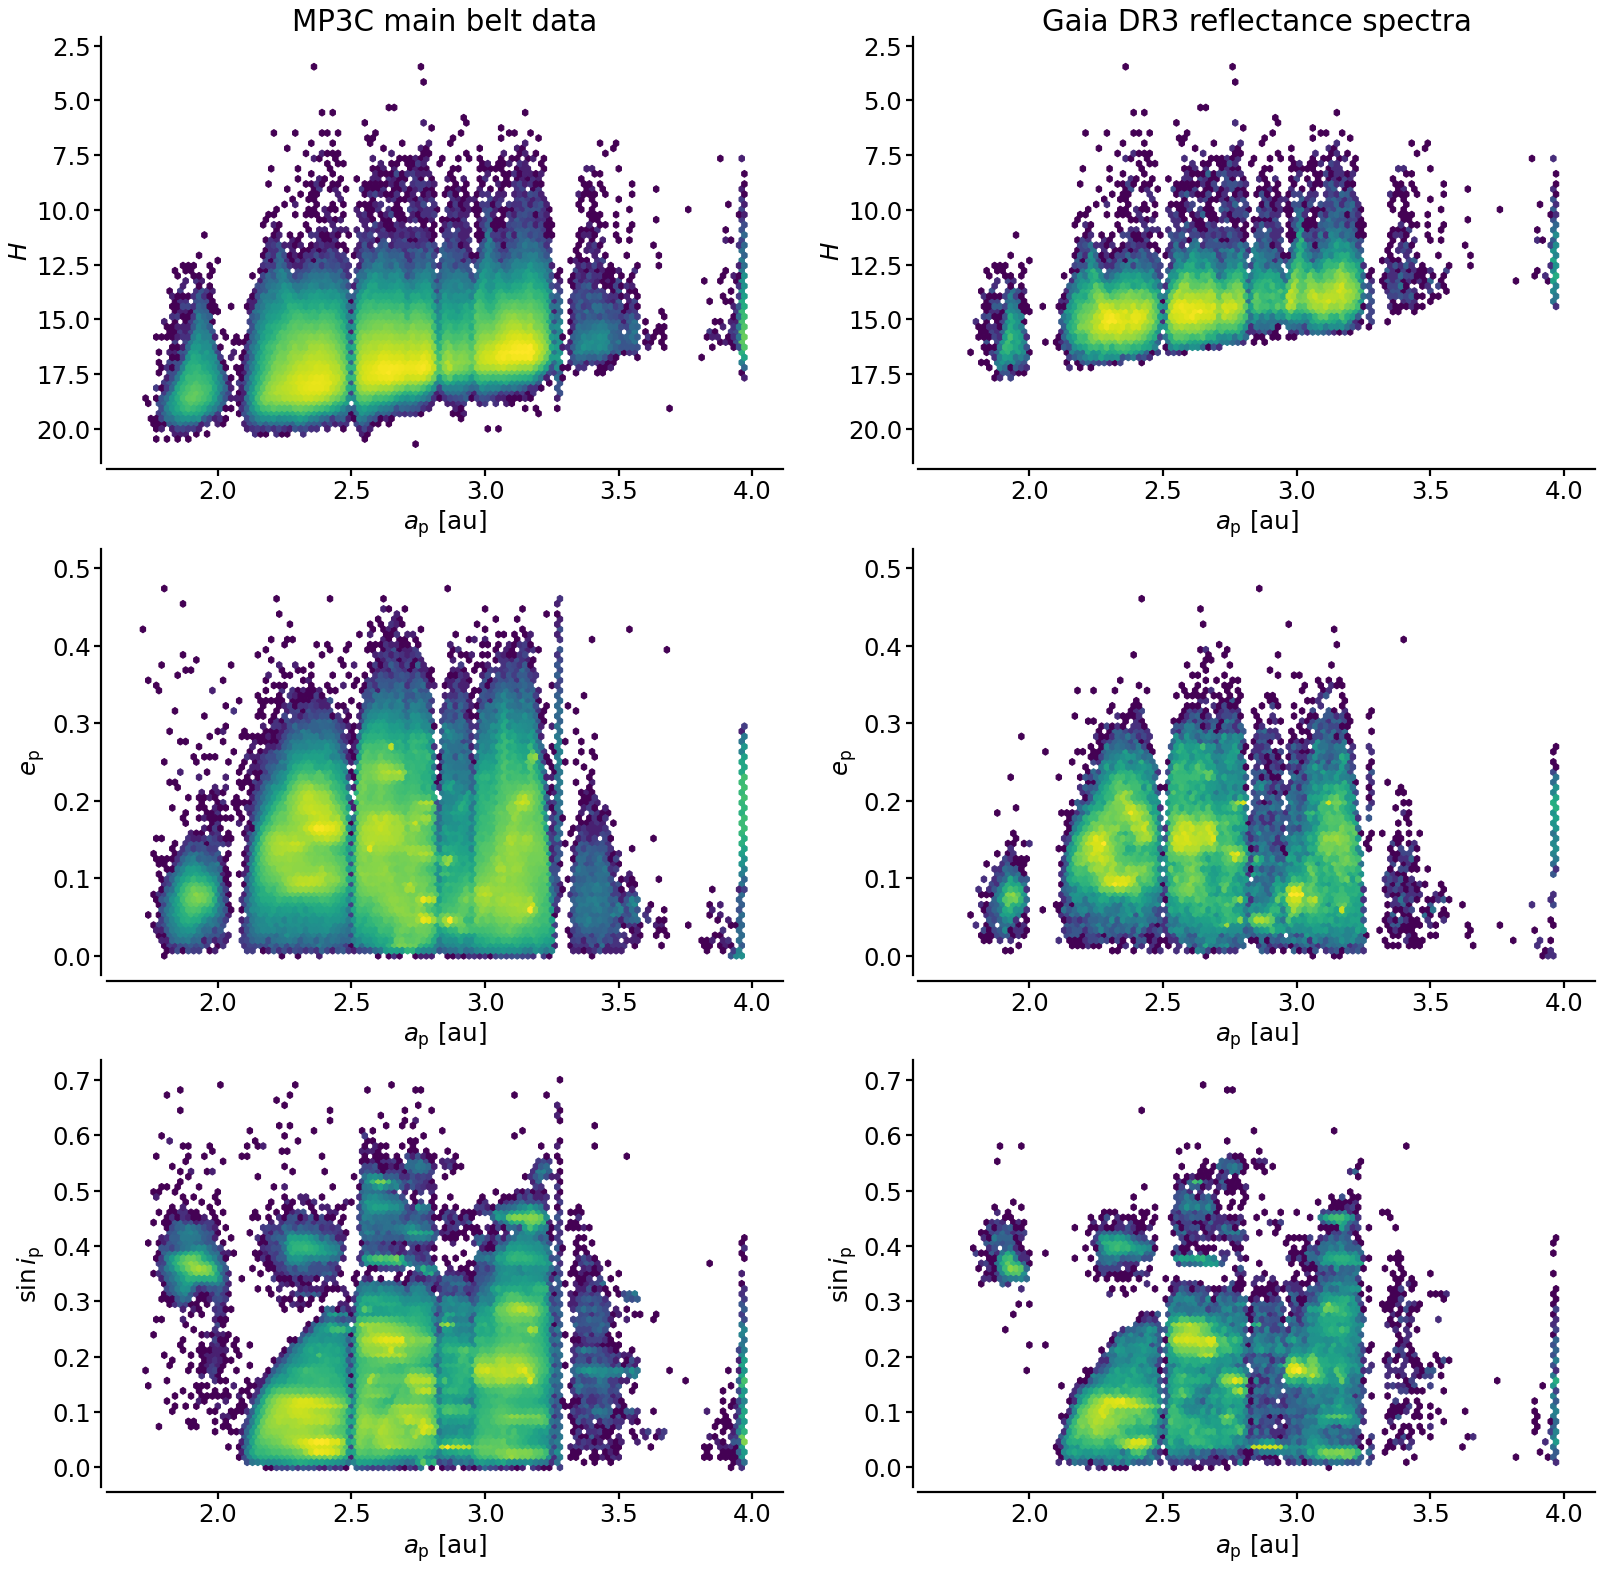

In [4]:
fig = plt.figure(figsize=(2 * 12, 3 * 8))
gs = GridSpec(3, 2, figure=fig)
axall = []
axall.append(fig.add_subplot(gs[0, 0]))
axall.append(fig.add_subplot(gs[0, 1]))
axall.append(fig.add_subplot(gs[1, 0]))
axall.append(fig.add_subplot(gs[1, 1]))
axall.append(fig.add_subplot(gs[2, 0]))
axall.append(fig.add_subplot(gs[2, 1]))
for ax in axall:
    apply_tufte(ax)

im = axall[0].hexbin(
    mainbelt.a_p,
    mainbelt.h,
    bins="log",
    mincnt=1,
    gridsize=(115, int(66 / np.sqrt(3))),
    extent=[1.7, 4, 3, 20.7],
)
axall[0].set_xlabel(r"$a_\mathrm{p}$ [au]")
axall[0].set_ylabel(r"$H$")
axall[0].invert_yaxis()
axall[0].set_title("MP3C main belt data")

im = axall[1].hexbin(
    dr3classified.a_p,
    dr3classified.h,
    bins="log",
    mincnt=1,
    gridsize=(115, int(66 / np.sqrt(3))),
    extent=[1.7, 4, 3, 20.7],
)
axall[1].set_xlabel(r"$a_\mathrm{p}$ [au]")
axall[1].set_ylabel(r"$H$")
axall[1].invert_yaxis()
axall[1].set_title("Gaia DR3 reflectance spectra")

im = axall[2].hexbin(
    mainbelt.a_p,
    mainbelt.e_p,
    bins="log",
    mincnt=1,
    gridsize=(115, int(66 / np.sqrt(3))),
    extent=[1.7, 4, 0, 0.5],
)
axall[2].set_xlabel(r"$a_\mathrm{p}$ [au]")
axall[2].set_ylabel(r"$e_\mathrm{p}$")

im = axall[3].hexbin(
    dr3classified.a_p,
    dr3classified.e_p,
    bins="log",
    mincnt=1,
    gridsize=(115, int(66 / np.sqrt(3))),
    extent=[1.7, 4, 0, 0.5],
)
axall[3].set_xlabel(r"$a_\mathrm{p}$ [au]")
axall[3].set_ylabel(r"$e_\mathrm{p}$")

im = axall[4].hexbin(
    mainbelt.a_p,
    mainbelt.sin_i_p,
    bins="log",
    mincnt=1,
    gridsize=(115, int(66 / np.sqrt(3))),
    extent=[1.7, 4, 0, 0.7],
)
axall[4].set_xlabel(r"$a_\mathrm{p}$ [au]")
axall[4].set_ylabel(r"$\sin i_\mathrm{p}$")

im = axall[5].hexbin(
    dr3classified.a_p,
    dr3classified.sin_i_p,
    bins="log",
    mincnt=1,
    gridsize=(115, int(66 / np.sqrt(3))),
    extent=[1.7, 4, 0, 0.7],
)
axall[5].set_xlabel(r"$a_\mathrm{p}$ [au]")
axall[5].set_ylabel(r"$\sin i_\mathrm{p}$")

plt.show()

## Examine the C-type asteroids
Use the following class definitions for the C-type asteroids:
* C-type with h-band: $p\geq0.8$ and $s\leq0.1$
* C-type without h-band: $p\leq0.2$ and $s\leq0.1$
* Asteroids outside this category are "dubious" in terms of the presence of an h-band.
where $p$ is the median over the class probabilities and $s$ the RSE.

First show the families to which the asteroids are associated. The table is restricted to families in which there are at more then 10 asteroids classified as having an h-band or not having an h-band.

In [25]:
pthresh = 0.8
sthresh = 0.1
families = create_families_table(dr3hband, pmin=sthresh, smax=sthresh)
families["hfrac"] = families.N_hband / families.N_total
print(
    f"Number of families with N_hband+N_nohband>10: {families.N_hband[families.N_hband + families.N_nohband> 10].size-1}"
)
families[families.N_hband + families.N_nohband > 10]

Number of families with N_hband+N_nohband>10: 8


,parent_name,N_total,N_hband,N_nohband,N_dubious,hfrac
39,Meliboea,26,11,1,15,0.423077
41,Pallas,40,1,11,28,0.025
42,Dora,55,12,1,42,0.218182
43,Hygiea,55,2,10,44,0.036364
44,Adeona,74,17,2,56,0.22973
45,Alauda,97,5,18,76,0.051546
46,Nysa,118,4,32,82,0.033898
47,Themis,332,12,84,242,0.036145
48,None,1221,194,250,835,0.158886


### Orbital elements of h-band vs no-h-band asteroids

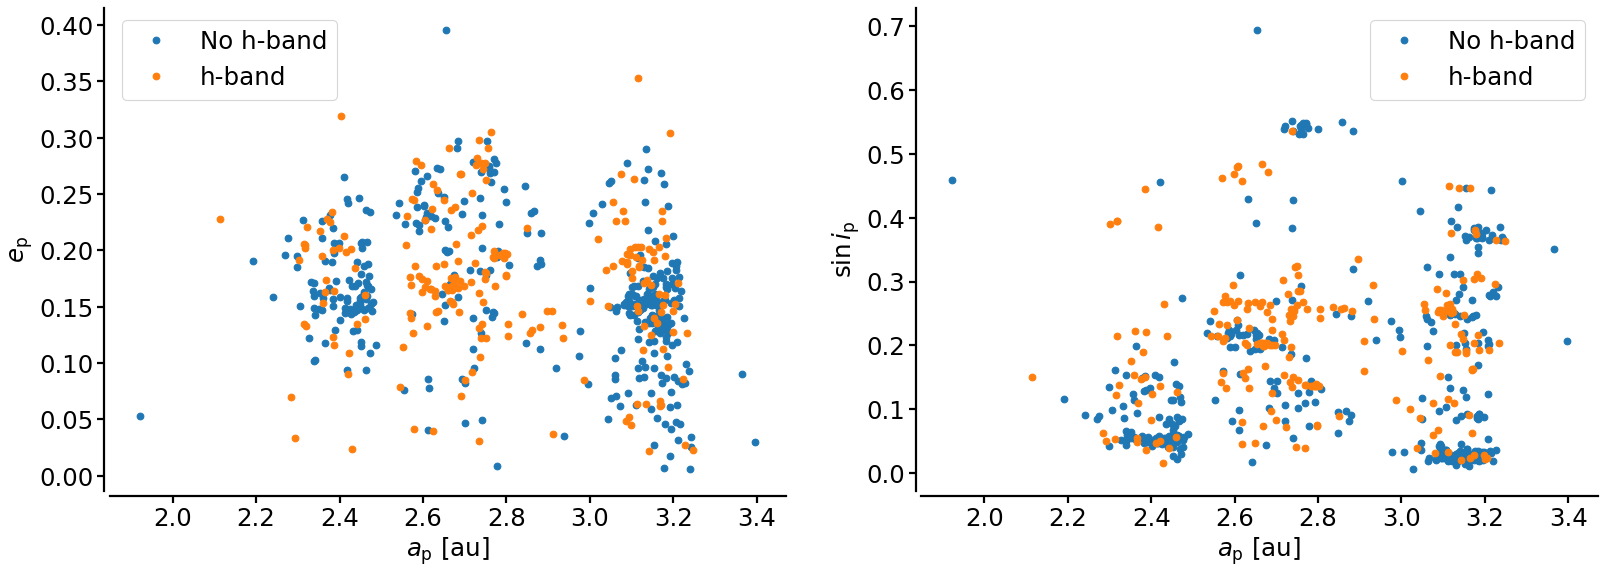

In [26]:
hband, nohband = get_hband_nohband_indices(dr3hband, pmin=pthresh, smax=sthresh)
fig = plt.figure(figsize=(2 * 12, 8))
gs = GridSpec(1, 2, figure=fig)
axct = []
axct.append(fig.add_subplot(gs[0, 0]))
axct.append(fig.add_subplot(gs[0, 1]))
for ax in axct:
    apply_tufte(ax)

axct[0].plot(dr3hband.a_p[nohband], dr3hband.e_p[nohband], "o", label="No h-band")
axct[0].plot(dr3hband.a_p[hband], dr3hband.e_p[hband], "o", label="h-band")
axct[0].set_xlabel(r"$a_\mathrm{p}$ [au]")
axct[0].set_ylabel(r"$e_\mathrm{p}$")
axct[0].legend()

axct[1].plot(dr3hband.a_p[nohband], dr3hband.sin_i_p[nohband], "o", label="No h-band")
axct[1].plot(dr3hband.a_p[hband], dr3hband.sin_i_p[hband], "o", label="h-band")
axct[1].set_xlabel(r"$a_\mathrm{p}$ [au]")
axct[1].set_ylabel(r"$\sin i_\mathrm{p}$")
axct[1].legend()

plt.show()

### Inverse diameter and $H$ vs $a_\mathrm{p}$ for each family

Only show families with more than 10 asteroids with or without h-band feature.

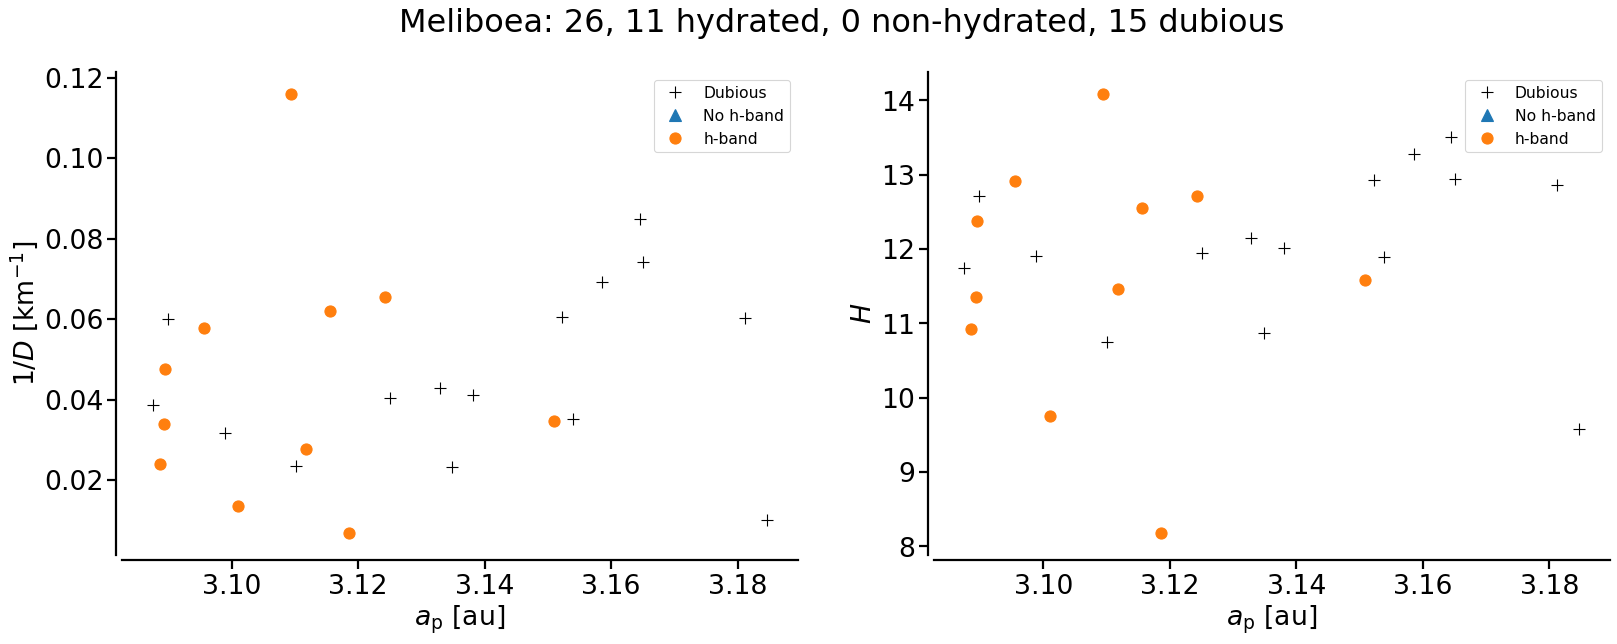

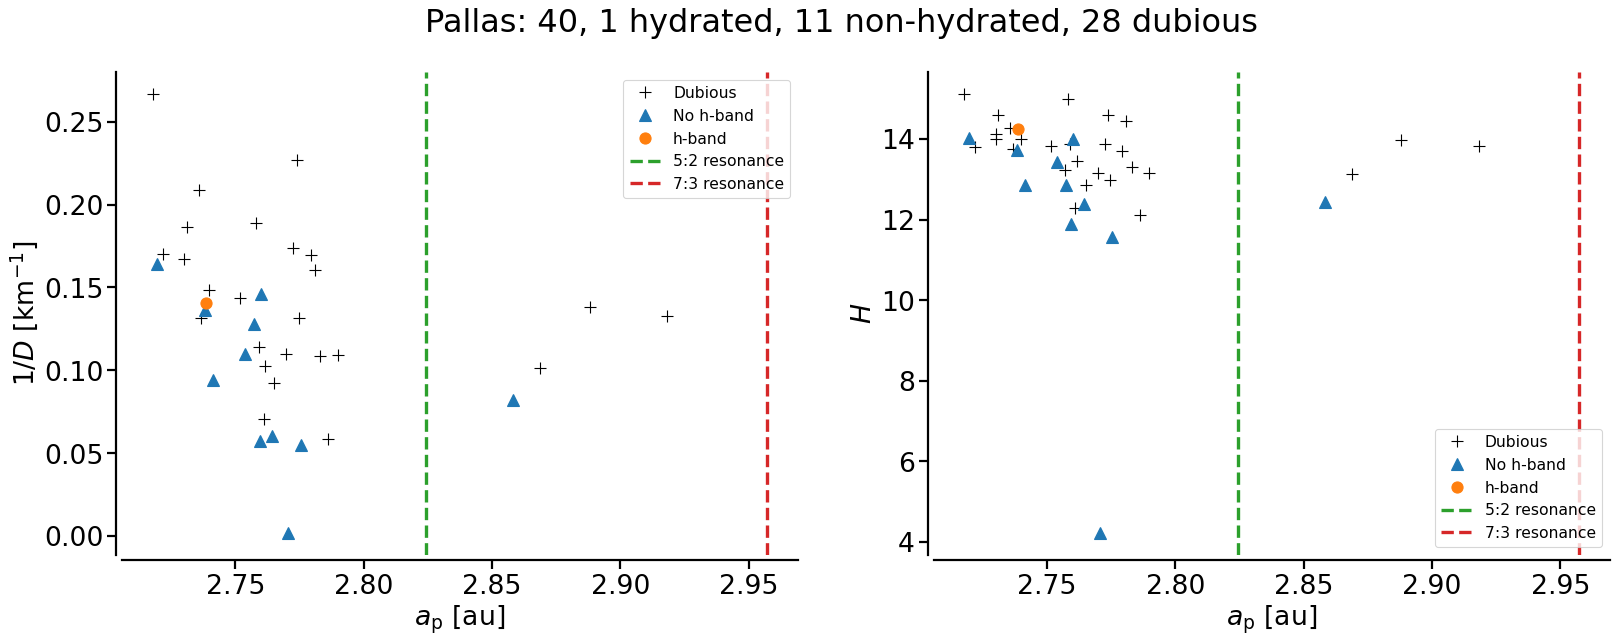

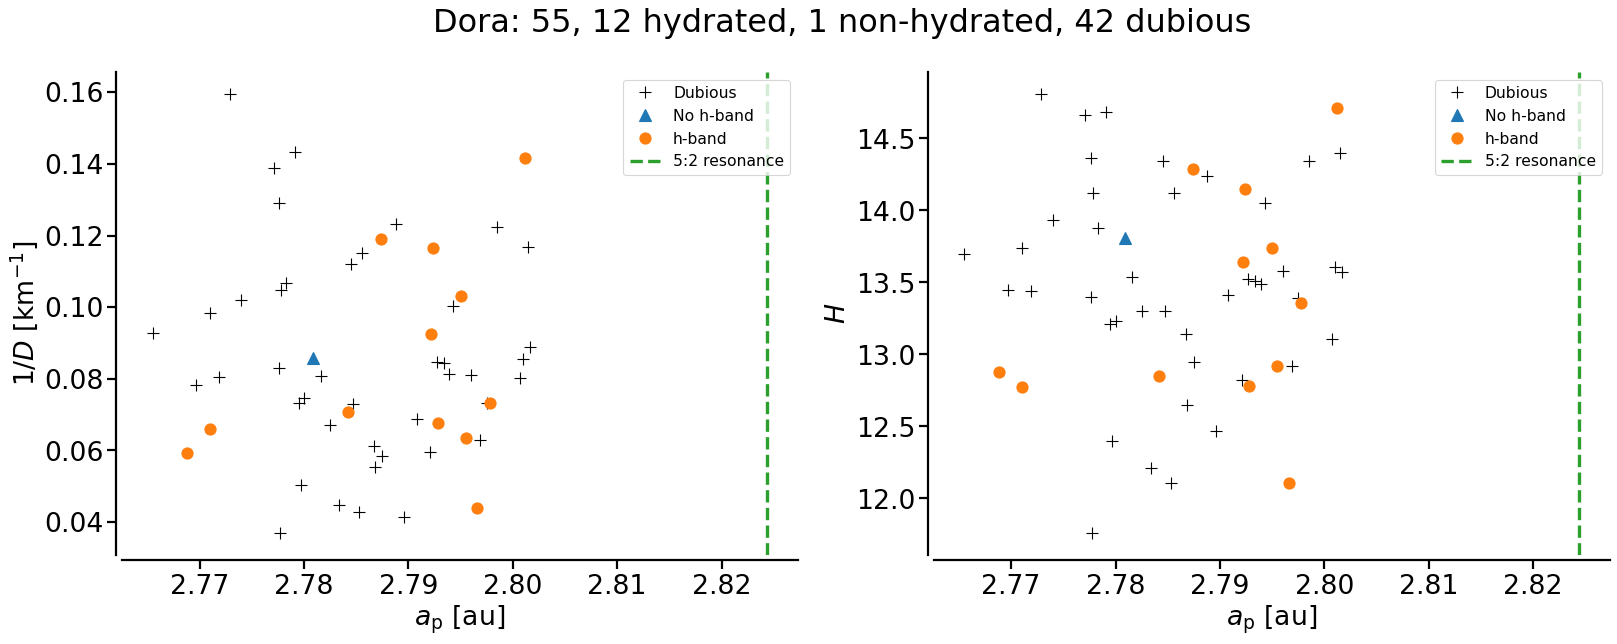

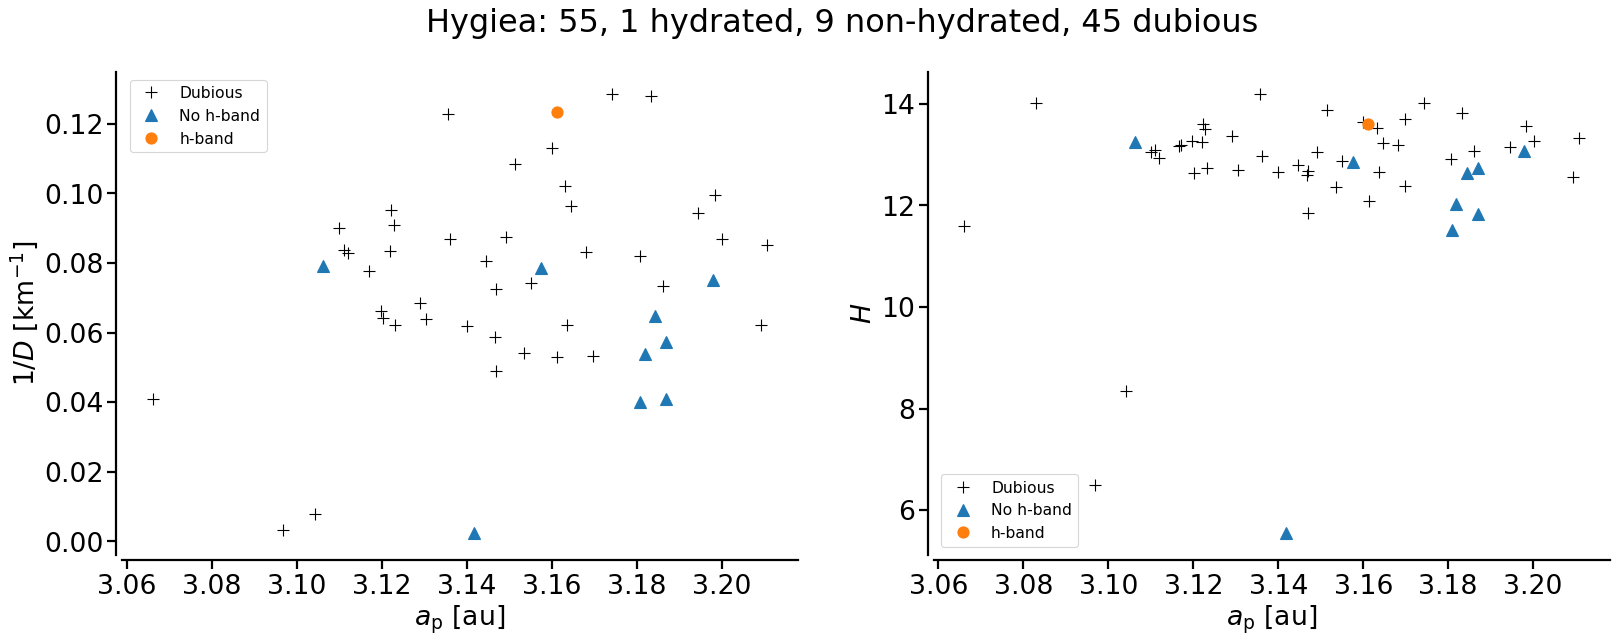

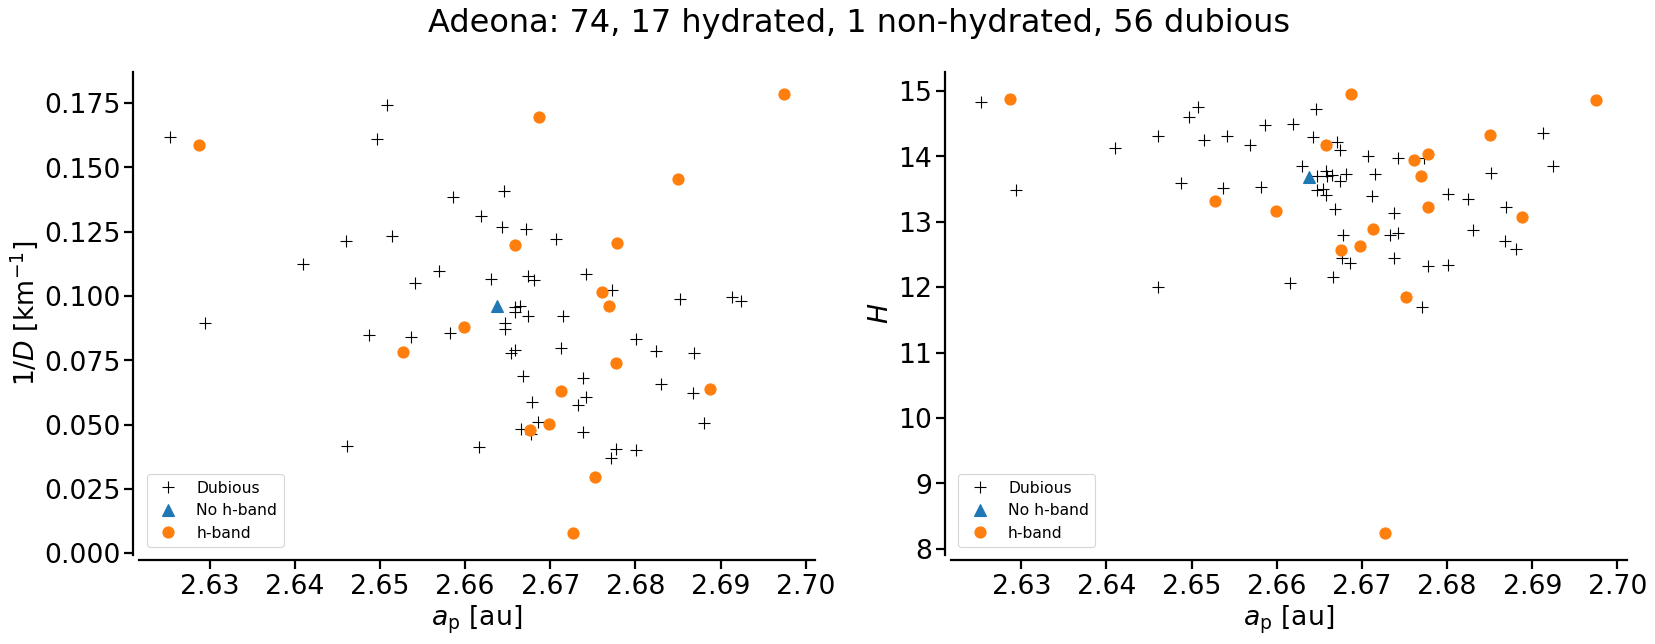

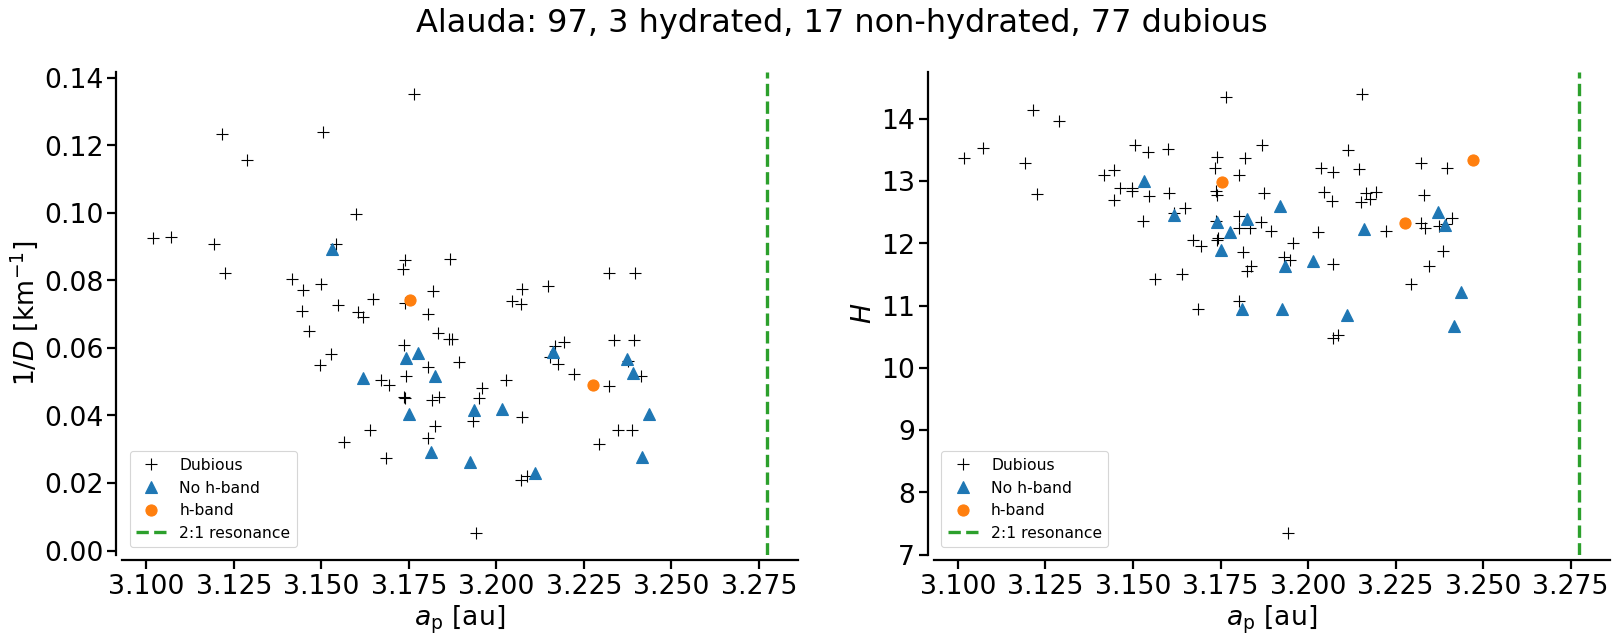

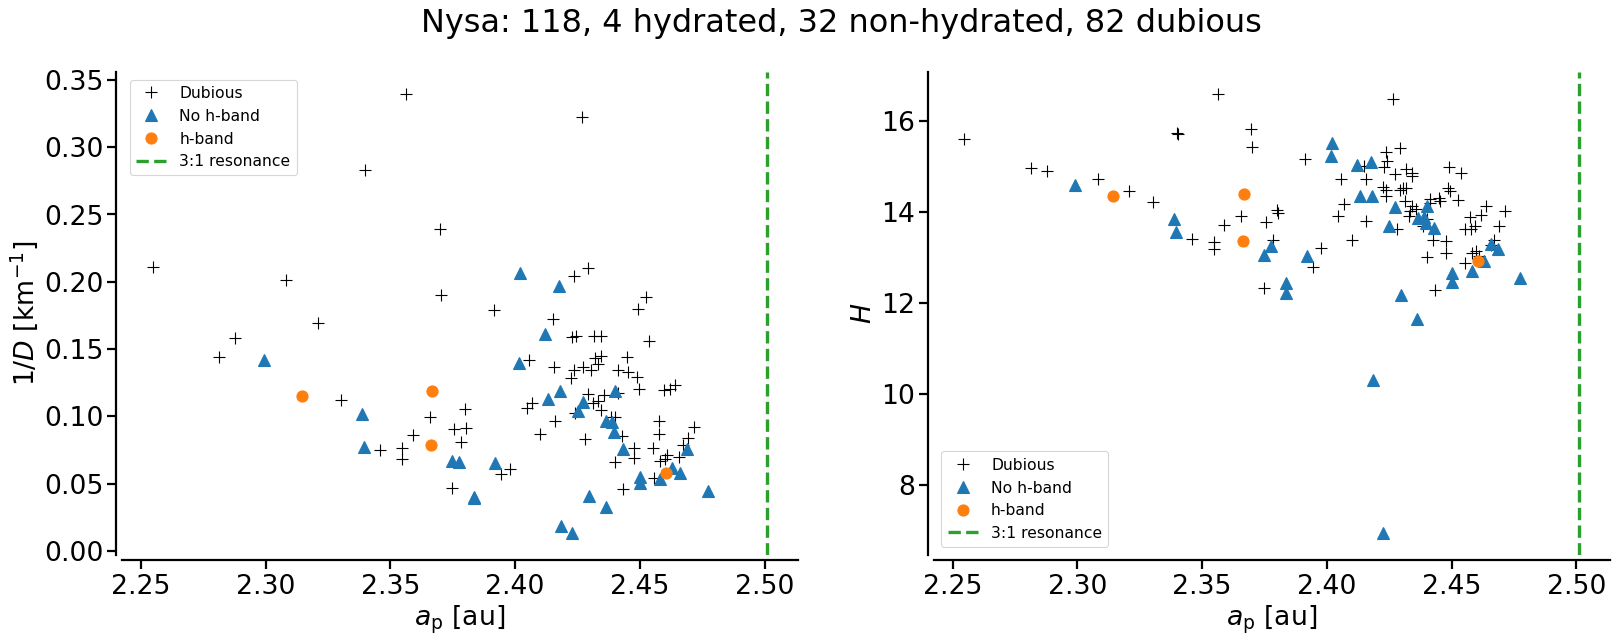

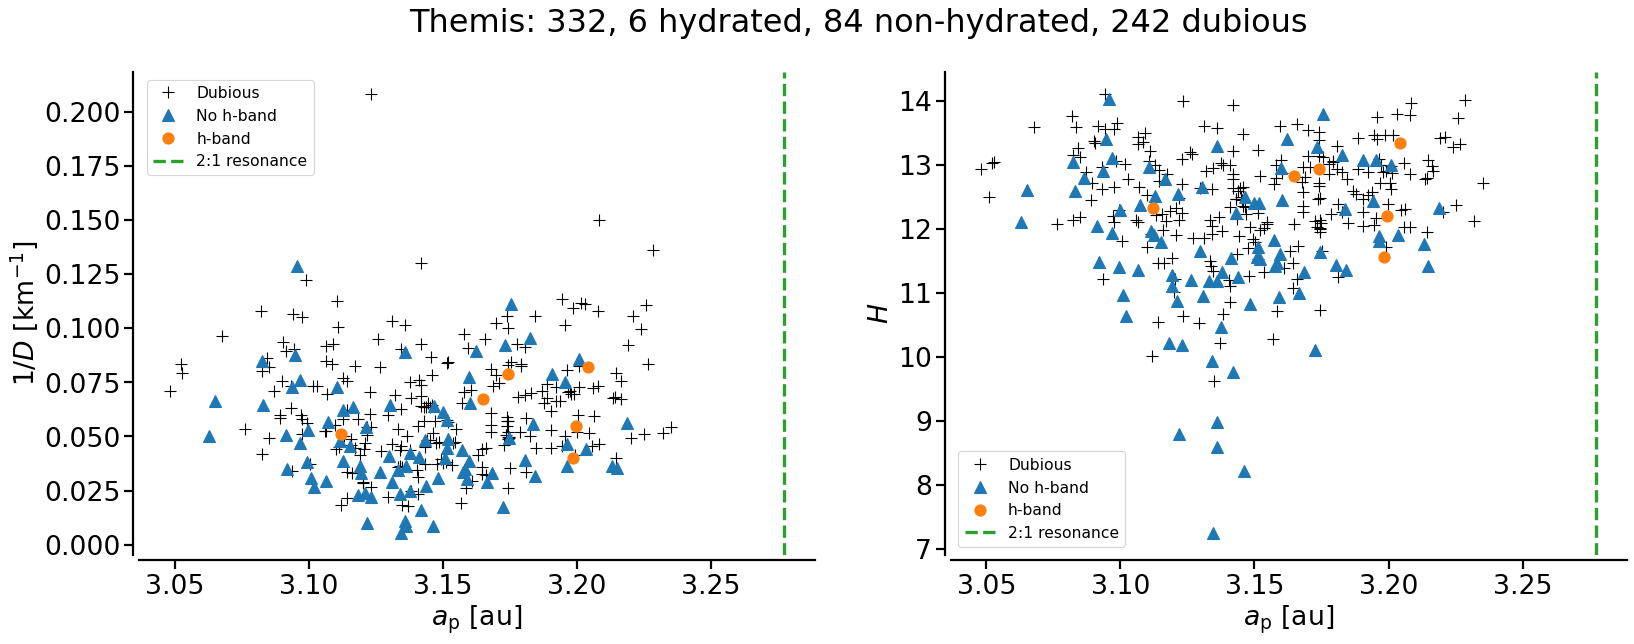

In [27]:
famlist = families.parent_name[
    (families.N_hband + families.N_nohband > 10) & (families.parent_name != "None")
]

for fam in famlist:
    plot_ctype_families(dr3hband, fam)
    plt.show()

### Statistics of asteroids with h-band vs. rest of C-types

Provide statistics as in the paper by [Rivkin (2012)](http://dx.doi.org/10.1016/j.icarus.2012.08.042).

Overall fraction of hydrated asteroids (Ch/C): 229/2208=0.10371376811594203
6.0 19.0


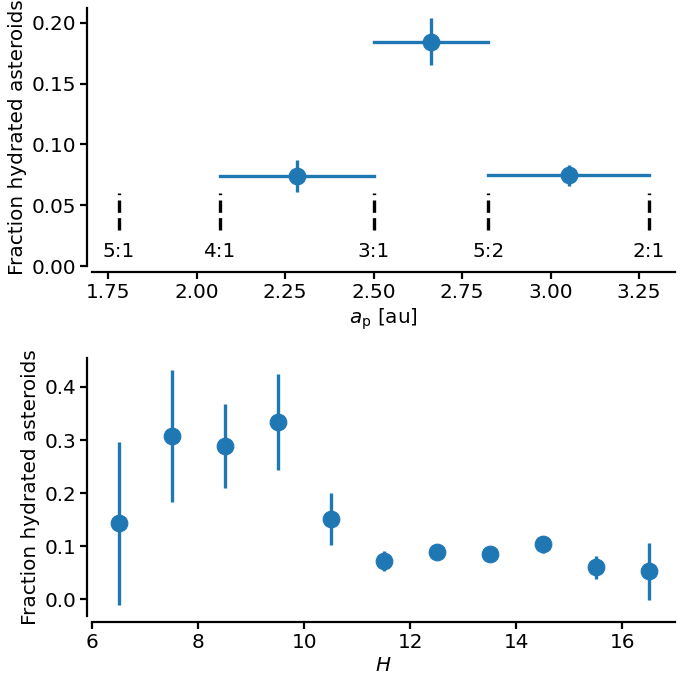

In [28]:
print(
    f"Overall fraction of hydrated asteroids (Ch/C): {dr3hband.a_p[hband].size}/{dr3hband.a_p.size}={dr3hband.a_p[hband].size/dr3hband.a_p.size}"
)
resonances = get_resonances()

# Set to true to produce figure for LARIM proceedings
forlarim = True

if forlarim:
    useagab(fontsize=18, linewidths=3, axislinewidths=2)
    symsize = 15
    fig = plt.figure(figsize=(9, 2 * 4.5), tight_layout=True)
    gs = GridSpec(2, 1, figure=fig)
else:
    symsize = 20
    fig = plt.figure(figsize=(2 * 12, 8), tight_layout=True)
    gs = GridSpec(1, 2, figure=fig)

axstats = []
axstats.append(fig.add_subplot(gs[0]))
axstats.append(fig.add_subplot(gs[1]))
for ax in axstats:
    apply_tufte(ax)

bin_edges = np.array(
    [
        resonances["5:1"],
        resonances["4:1"],
        resonances["3:1"],
        resonances["5:2"],
        resonances["2:1"],
    ]
)
bin_mids = (bin_edges[1:] - bin_edges[0:-1]) / 2 + bin_edges[0:-1]
hist_C, _ = np.histogram(dr3hband.a_p, bins=bin_edges)
hist_Ch, _ = np.histogram(dr3hband.a_p[hband], bins=bin_edges)
valid = (hist_C > 5) & (hist_Ch > 0)
fraction = np.zeros(hist_C.size)
fraction[valid] = hist_Ch[valid] / hist_C[valid]
fraction_unc = np.zeros(hist_C.size)
fraction_unc[valid] = (
    np.sqrt((1 / hist_Ch[valid] + 1 / hist_C[valid])) * fraction[valid]
)

for i in range(bin_mids.size):
    if fraction[i] > 0.0:
        axstats[0].plot(
            [bin_edges[i], bin_edges[i + 1]],
            [fraction[i], fraction[i]],
            "-",
            color="C0",
        )
# axstats[0].stairs(fraction, edges=bin_edges, lw=3)
axstats[0].errorbar(
    bin_mids[fraction > 0],
    fraction[fraction > 0],
    yerr=fraction_unc[fraction > 0],
    fmt="oC0",
    ms=symsize,
)
axstats[0].set_xlabel(r"$a_\mathrm{p}$ [au]")
axstats[0].set_ylabel("Fraction hydrated asteroids")
for reso in ["5:1", "4:1", "3:1", "5:2", "2:1"]:
    axstats[0].plot([resonances[reso], resonances[reso]], [0.03, 0.06], "--k")
    axstats[0].text(resonances[reso], 0.02, reso, va="top", ha="center")

Hlow = np.floor(dr3hband.h[hband].min())
Hhigh = np.ceil(dr3hband.h[hband].max())
nHbins = int(Hhigh - Hlow)
print(Hlow, Hhigh)
Hbinmids = Hlow + 0.5 + np.arange(nHbins)

hist_H_C, _ = np.histogram(dr3hband.h, bins=nHbins, range=[Hlow, Hhigh])
hist_H_Ch, _ = np.histogram(dr3hband.h[hband], bins=nHbins, range=[Hlow, Hhigh])
validH = (hist_H_C > 5) & (hist_H_Ch > 0)
fractionH = np.zeros(hist_H_C.size)
fractionH[validH] = hist_H_Ch[validH] / hist_H_C[validH]
fractionH_unc = np.zeros(fractionH.size)
fractionH_unc[validH] = (
    np.sqrt((1 / hist_H_Ch[validH] + 1 / hist_H_C[validH])) * fractionH[validH]
)
axstats[1].errorbar(
    Hbinmids[validH],
    fractionH[validH],
    yerr=fractionH_unc[validH],
    fmt="o",
    ms=symsize,
)
axstats[1].set_xlabel(r"$H$")

ymax = np.max(np.array([axstats[0].get_ylim(), axstats[1].get_ylim()]))
ymax0 = axstats[0].get_ylim()[1]
axstats[0].set_ylim(0, ymax0)
# axstats[0].set_ylim(0, ymax)
# axstats[1].set_ylim(0, ymax)

if forlarim:
    axstats[1].set_ylabel("Fraction hydrated asteroids")

if forlarim:
    plt.savefig("brown_fig1.pdf")
    useagab(fontsize=22, linewidths=3, axislinewidths=2)

plt.show()